In [1]:
import pandas as pd
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle
from shapely import wkt

In [2]:
with open('20251015_Best_Model.pkl','rb') as file:
    model = pickle.load(file)

In [4]:
new_park = pd.read_csv('new_park.csv')
new_park.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'geometry', 'grid_id', 'Schools_count',
       'Landmarks_count', 'Metros_count', 'Housings_count',
       'Affordable_Housings_count', 'job_count',
       'nearest_residential_distance', 'nearest_MHA_distance',
       'nearest_metro_distance', 'nearest_school_distance',
       'nearest_landmark_distance', 'nearest_park_distance',
       'distance_to_nearest_bike_network', 'POP_DENSITY',
       'EMPLOYED_PERCENTAGE', 'UNDER5_PERCENTAGE', '65_PERCENTAGE',
       'PEOPLE_OF_COLOR_PERCENTAGE', 'POVERTY_PERCENTAGE', 'TOTAL_AREA',
       'TYPE', 'index_right', 'title', 'SymbolID', 'SHAPE_Leng', 'SHAPE_Area'],
      dtype='object')

In [5]:
new_park

,Unnamed: 0.1,Unnamed: 0,geometry,grid_id,Schools_count,Landmarks_count,Metros_count,Housings_count,Affordable_Housings_count,job_count,...,65_PERCENTAGE,PEOPLE_OF_COLOR_PERCENTAGE,POVERTY_PERCENTAGE,TOTAL_AREA,TYPE,index_right,title,SymbolID,SHAPE_Leng,SHAPE_Area
0,64,64,POLYGON ((-13610060.02253521 6026788.165168248...,64,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,14,Polygon,14,37539.785477,3.725596e+07
1,66,66,"POLYGON ((-13609668.6360298 6027004.684771019,...",66,0.0,2.0,86.0,56.0,19.0,0.0,...,10.116982,24.665744,7.558706,3948.0,4.0,14,Polygon,14,37539.785477,3.725596e+07
2,68,68,POLYGON ((-13610451.39185307 6026571.634657405...,68,5.0,1.0,464.0,106.0,97.0,0.0,...,14.006815,36.033441,7.823034,2829.0,2.0,14,Polygon,14,37539.785477,3.725596e+07
3,76,76,POLYGON ((-13610667.27275992 6026964.203915125...,76,2.0,0.0,274.0,135.0,35.0,0.0,...,15.671702,46.413197,10.016453,2030.0,2.0,14,Polygon,14,37539.785477,3.725596e+07
4,77,77,"POLYGON ((-13609940.7344378 6027499.572557916,...",77,0.0,0.0,0.0,0.0,0.0,0.0,...,4.708904,42.979452,0.513699,421.0,1.0,14,Polygon,14,37539.785477,3.725596e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,2659,2659,POLYGON ((-13619619.18143843 6062736.468903937...,2659,0.0,0.0,0.0,0.0,0.0,0.0,...,5.592841,36.073826,1.062640,4450.0,1.0,0,Polygon,0,14539.945026,5.225315e+06
1406,2661,2661,POLYGON ((-13619262.29871472 6062736.633340627...,2661,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,0,Polygon,0,14539.945026,5.225315e+06
1407,2661,2661,POLYGON ((-13619262.29871472 6062736.633340627...,2661,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,1,Polygon,1,7322.903446,2.343306e+06
1408,2664,2664,"POLYGON ((-13620644.6782535 6062737.048072523,...",2664,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,0,Polygon,0,14539.945026,5.225315e+06


In [6]:
new_park['geometry'] = new_park['geometry'].apply(wkt.loads)
geometry = new_park['geometry'].copy()
park_preds_df = gpd.GeoDataFrame(new_park,geometry = 'geometry')

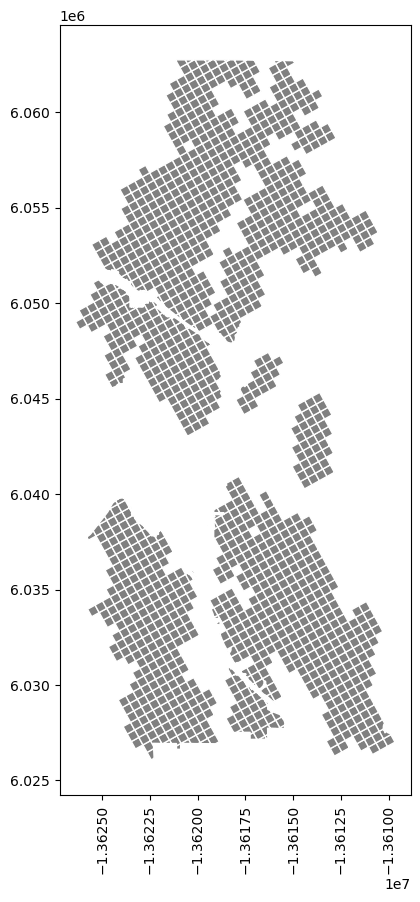

In [11]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize= (10,10))
park_preds_df.plot(facecolor = 'grey',edgecolor = 'white',ax = ax)
for label in ax.get_xticklabels():
    label.set_rotation(90)

In [9]:
new_park = new_park.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'geometry', 'grid_id','TOTAL_AREA', 'TYPE', 'index_right', 'title', 'SymbolID', 'SHAPE_Leng', 'SHAPE_Area'])

In [12]:
import numpy as np

# 进行预测
predicted_area = model.predict(new_park)

# 将预测结果存在一个新的DataFrame
prediction_grid_xp = pd.DataFrame(predicted_area,columns = ['predicted_area'],index = new_park.index)
prediction_grid_xp

,predicted_area
0,1134.942112
1,73803.153333
2,74417.833333
3,72228.786667
4,3910.696667
...,...
1405,3870.376667
1406,1134.942112
1407,1134.942112
1408,1134.942112


In [15]:
# 计算百分位数
prediction_grid_xp['prediction_percentile'] = pd.qcut(prediction_grid_xp['predicted_area'],q = 10,labels = False,duplicates = 'drop')*10
# pd.qcut 是一个 Pandas 函数，用于根据数据的分位数将数据分为等份。这里使用 q=10，将prediction_grid_xp['predicted_area'] 列的数据分为 10 个分位（即 10 个区间，每个区间代表 10% 的数据）。
# labels=False 表示不会给这些分位区间分配标签，而是直接使用整数值（0 到 9）表示每个数据点所属的分位区间。
# 乘以 10 将这些整数值转换为百分比。结果是 prediction_grid_xp['prediction_percentile'] 中的值会是 0, 10, 20,..., 90，这表示对应数据点落在的百分位数（例如，10 表示第 10 百分位，90 表示第 90 百分位）。

prediction_grid_xp['prediction_percentile'] = prediction_grid_xp['prediction_percentile'].astype(str) + 'th Percentile'
prediction_grid_xp.loc[prediction_grid_xp['prediction_percentile'] == '100th Percentile','prediction_percentile'] = '99th Percentile'
# 由于 pd.qcut 的特性，有时最高分位数可能会被标记为 100th Percentile。这行代码将所有标记为 100th Percentile的数据修正为 99th Percentile。这样处理可能是为了避免 100th Percentile 的概念，因为在某些分析中，100 百分位数可能被视为不合适或不准确。
# 计算百分位数可以帮助将 predicted_area 数据分成十等分，使得你可以分析哪些区域的预测值较高，哪些区域的预测值较低。这对于排序和分组非常有用。
# 百分位数越高，说明模型预测该区域会有较大的面积。这可能暗示该区域的重要性、发展潜力、或其他相关因素较高。

In [17]:
prediction_grid_xp

,predicted_area,prediction_percentile
0,1134.942112,0th Percentile
1,73803.153333,40th Percentile
2,74417.833333,40th Percentile
3,72228.786667,30th Percentile
4,3910.696667,10th Percentile
...,...,...
1405,3870.376667,10th Percentile
1406,1134.942112,0th Percentile
1407,1134.942112,0th Percentile
1408,1134.942112,0th Percentile


In [20]:
park_preds_df['predicted_area'] = prediction_grid_xp['predicted_area']
park_preds_df['prediction_percentile'] = prediction_grid_xp['prediction_percentile']
park_preds_df = park_preds_df.rename(columns = {'index_right' : 'index'})
park_preds_df.head()

,Unnamed: 0.1,Unnamed: 0,geometry,grid_id,Schools_count,Landmarks_count,Metros_count,Housings_count,Affordable_Housings_count,job_count,...,POVERTY_PERCENTAGE,TOTAL_AREA,TYPE,index,title,SymbolID,SHAPE_Leng,SHAPE_Area,predicted_area,prediction_percentile
0,64,64,"POLYGON ((-13610060.023 6026788.165, -13610451...",64,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,14,Polygon,14,37539.785477,3.725596e+07,1134.942112,0th Percentile
1,66,66,"POLYGON ((-13609668.636 6027004.685, -13610060...",66,0.0,2.0,86.0,56.0,19.0,0.0,...,7.558706,3948.0,4.0,14,Polygon,14,37539.785477,3.725596e+07,73803.153333,40th Percentile
2,68,68,"POLYGON ((-13610451.392 6026571.635, -13610842...",68,5.0,1.0,464.0,106.0,97.0,0.0,...,7.823034,2829.0,2.0,14,Polygon,14,37539.785477,3.725596e+07,74417.833333,40th Percentile
3,76,76,"POLYGON ((-13610667.273 6026964.204, -13611058...",76,2.0,0.0,274.0,135.0,35.0,0.0,...,10.016453,2030.0,2.0,14,Polygon,14,37539.785477,3.725596e+07,72228.786667,30th Percentile
4,77,77,"POLYGON ((-13609940.734 6027499.573, -13609884...",77,0.0,0.0,0.0,0.0,0.0,0.0,...,0.513699,421.0,1.0,14,Polygon,14,37539.785477,3.725596e+07,3910.696667,10th Percentile


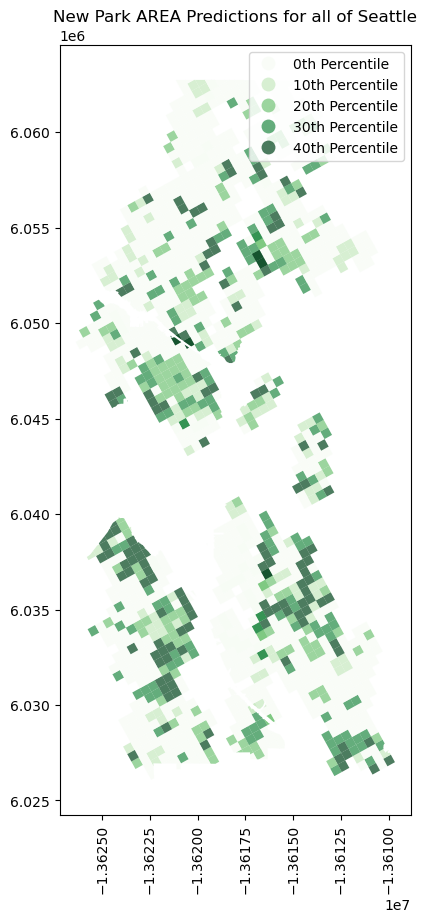

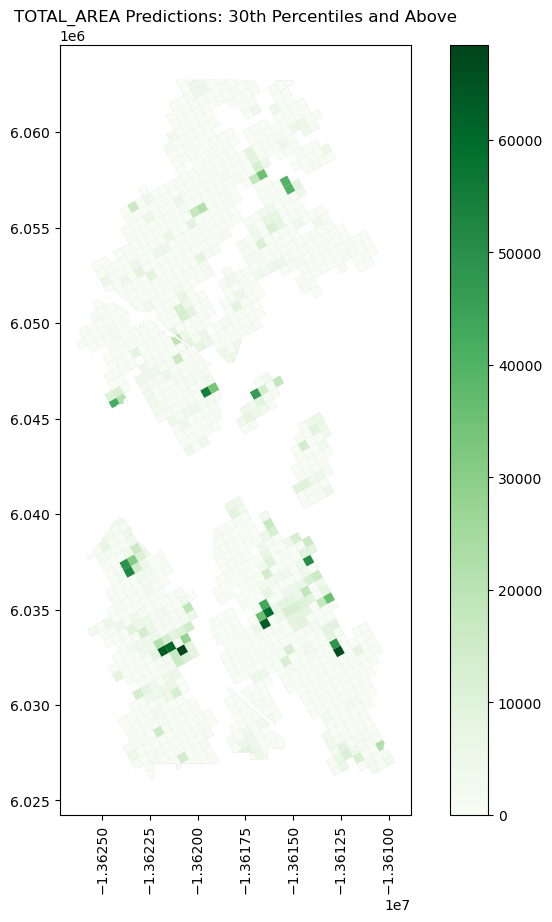

In [23]:
gdf = gpd.GeoDataFrame(park_preds_df,geometry = park_preds_df.geometry)

fig,ax = plt.subplots(1,1,figsize = (10,10))
gdf.plot(column='prediction_percentile', ax=ax, legend=True, cmap='Greens', alpha=0.7)
ax.set_title('New Park AREA Predictions for all of Seattle')
for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax, color='lightgrey')
gdf.plot(column='TOTAL_AREA', ax=ax, legend=True, cmap='Greens')
ax.set_title('TOTAL_AREA Predictions: 30th Percentiles and Above')
for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()